In [ ]:
● Read from the bottom up
● Vertical lines represent clusters

● Clusters are contained in one another
● At each step, the two closest clusters are merged
● This is “agglomerative” hierarchical clustering

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster

In [2]:
%matplotlib inline
plt.interactive(False)

In [3]:
df1 = pd.read_csv("..\data\Grains\seedsdc.csv")
seeds = np.array(df1)

In [4]:
df2 = pd.read_csv("..\data\Grains\lab.csv")
varieties = np.array(df2)

varieties = varieties.flatten()
varieties.shape

(41,)

In [5]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3)
# Use fit_predict to fit model and obtain cluster labels
labels = model.fit_predict(seeds)

In [6]:
# Calculate the linkage: mergings
mergings = linkage(seeds, method='complete')
mergings.shape

(40, 4)

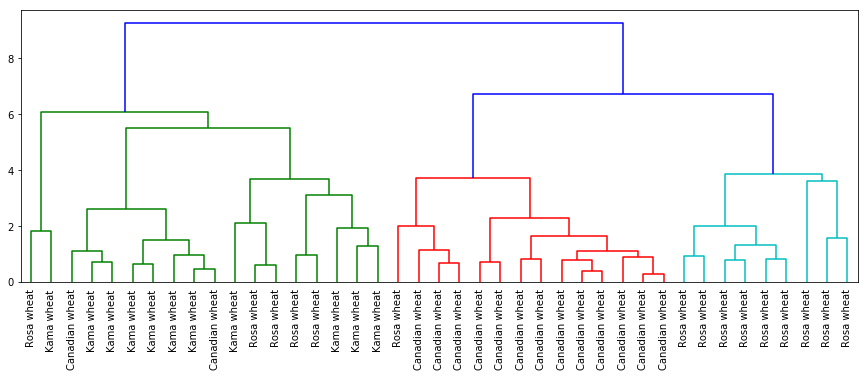

In [7]:
plt.figure(figsize=(15, 5))
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,labels=varieties,leaf_rotation=90,leaf_font_size=10)

plt.show()

SciPy hierarchical clustering doesn't fit into a sklearn pipeline, 
so on pre-processing use the normalize() function from sklearn.preprocessing instead of Normalizer.

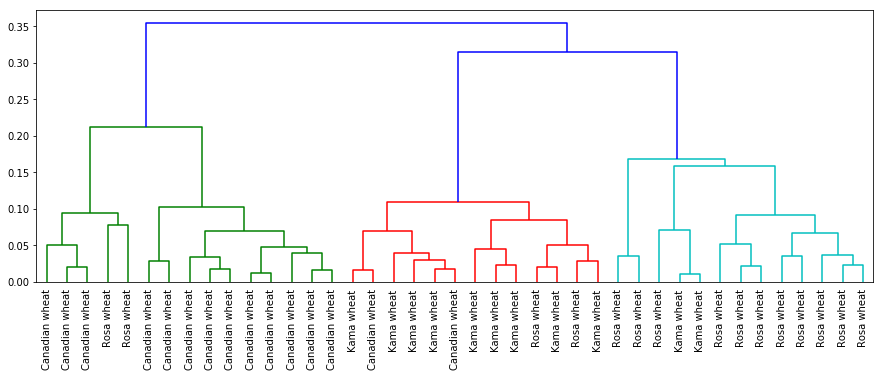

In [8]:
# Normalize the movements
normalized_seeds = normalize(seeds)
# Calculate the linkage
mergings = linkage(normalized_seeds, method='complete')
# Plot the dendrogram
plt.figure(figsize=(15, 5))
dendrogram(mergings,labels=varieties,leaf_rotation=90,leaf_font_size=10)
plt.show()

In [9]:
# Use fcluster to extract labels
labels = fcluster(mergings,6,criterion='distance')

In [10]:
# Create a DataFrame with labels and varieties as columns
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [11]:
# Create crosstab
ct = pd.crosstab(df['labels'],df['varieties'])
# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      15          11          15


In [11]:
df2 = pd.read_csv("..\data\eurovision.csv")
df2.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank
0,Albania,Belgium,20,16,24,22,24,25,14
1,Albania,Czech Republic,21,15,25,23,16,22,22
2,Albania,The Netherlands,22,14,23,24,21,24,24
3,Albania,Azerbaijan,19,12,11,21,11,13,19
4,Albania,Hungary,8,13,9,14,9,10,10


In [12]:
#df3 = df2["To country"]
#country_names = np.array(df3.unique())
del df2["From country"]
del df2["To country"]
votes = np.array(df2)
country_names = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine', 'United Kingdom']

In [13]:
# Calculate the linkage: 
mergings = linkage(votes, method='single')

# Plot the dendrogram
dendrogram(mergings,labels=country_names,leaf_rotation=90,leaf_font_size=6)
plt.show()

IndexError: list index out of range